In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

# K-Means Clustering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1rTuMmRkv_z18Ig_f_xWUhpXxADojSTcV?usp=sharing)

In [95]:
df = pd.read_csv("https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv")
df["Type 2"].fillna(df["Type 2"][4], inplace = True)

<ipython-input-95-1836dd43e233>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Type 2"].fillna(df["Type 2"][4], inplace = True)


In [96]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [97]:
df['Type 1'] = df['Type 1'].astype('category').cat.codes
df['Type 2'] = df['Type 2'].astype('category').cat.codes

In [98]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,9,13,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,9,13,405,60,62,63,80,80,60,1,False
2,3,Venusaur,9,13,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,9,13,625,80,100,123,122,120,80,1,False
4,4,Charmander,6,-1,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,15,4,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,15,4,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,14,8,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,14,1,680,80,160,60,170,130,80,6,True


In [99]:
# Selecting numerical columns for clustering
features = df[['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
features

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,9,13,318,45,49,49,65,65,45
1,9,13,405,60,62,63,80,80,60
2,9,13,525,80,82,83,100,100,80
3,9,13,625,80,100,123,122,120,80
4,6,-1,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...
795,15,4,600,50,100,150,100,150,50
796,15,4,700,50,160,110,160,110,110
797,14,8,600,80,110,60,150,130,70
798,14,1,680,80,160,60,170,130,80


In [100]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Text(0, 0.5, 'Inertia')

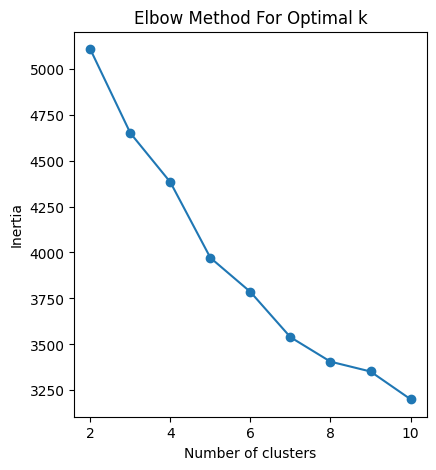

In [101]:
# Elbow plot to determine the optimal number of clusters
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

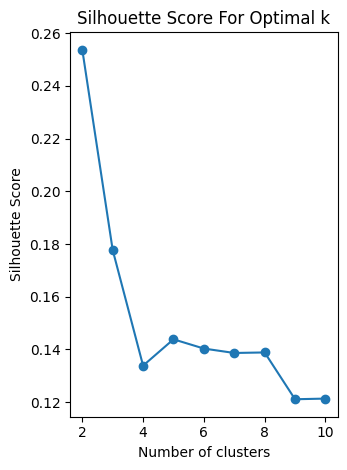

In [102]:
# Elbow plot to determine the optimal number of clusters
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [103]:
# Fit K-Means clustering on random k
kmeans = KMeans(n_clusters=4, random_state=3001)
kmeans.fit(scaled_features)

KMeans(n_clusters=4, random_state=3001)

In [104]:
# Add labels
df['Cluster'] = kmeans.labels_

In [105]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,1,Bulbasaur,9,13,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,9,13,405,60,62,63,80,80,60,1,False,3
2,3,Venusaur,9,13,525,80,82,83,100,100,80,1,False,3
3,3,VenusaurMega Venusaur,9,13,625,80,100,123,122,120,80,1,False,2
4,4,Charmander,6,-1,309,39,52,43,60,50,65,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,15,4,600,50,100,150,100,150,50,6,True,3
796,719,DiancieMega Diancie,15,4,700,50,160,110,160,110,110,6,True,2
797,720,HoopaHoopa Confined,14,8,600,80,110,60,150,130,70,6,True,2
798,720,HoopaHoopa Unbound,14,1,680,80,160,60,170,130,80,6,True,2


In [106]:
cluster_sizes = df['Cluster'].value_counts()
print(cluster_sizes)

Cluster
0    273
1    267
3    141
2    119
Name: count, dtype: int64


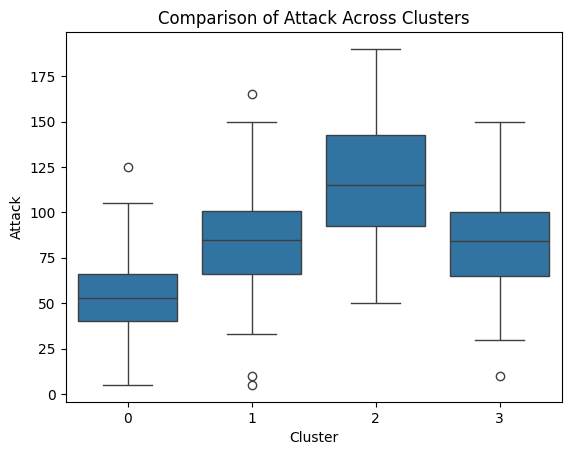

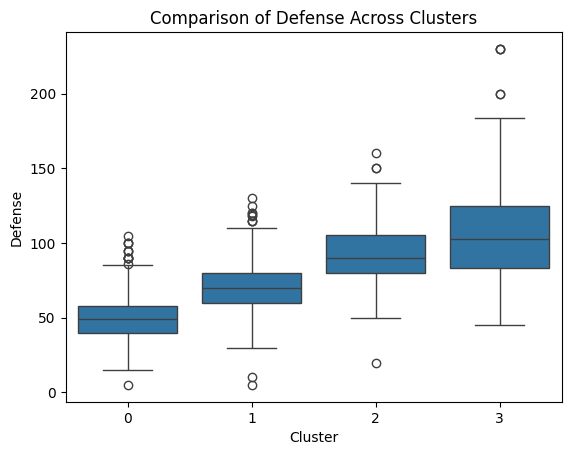

In [107]:
for feature in ['Attack', 'Defense']:
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Comparison of {feature} Across Clusters')
    plt.show()